# Example how-to create a signal time PDF

In [1]:
import numpy as np

from matplotlib import (
    pyplot as plt,
)

from skyllh.core.config import (
    Config,
)
from skyllh.core.detsigyield import (
    NullDetSigYieldBuilder,
)
from skyllh.core.flux_model import (
    GaussianTimeFluxProfile,
    NullFluxModel,
)
from skyllh.core.livetime import (
    Livetime,
)
from skyllh.core.parameters import (
    ParameterModelMapper,
)
from skyllh.core.signalpdf import (
    SignalTimePDF,
)
from skyllh.core.source_hypo_grouping import (
    SourceHypoGroup,
    SourceHypoGroupManager,
)
from skyllh.core.source_model import (
    SourceModel,
)
from skyllh.core.storage import (
    DataFieldRecordArray,
)
from skyllh.core.trialdata import (
    TrialDataManager,
)

In [2]:
cfg = Config()

In [3]:
livetime_data = np.array([
        [1, 3], 
        [4, 7],
        [8, 9],
    ],
    dtype=np.float64)
livetime = Livetime(livetime_data)

In [4]:
time_flux_profile = GaussianTimeFluxProfile(t0=4, sigma_t=0.2, cfg=cfg)

In [5]:
print(f't_start = {time_flux_profile.t_start}')
print(f't_stop = {time_flux_profile.t_stop}')

t_start = 2.5132311244600647
t_stop = 5.486768875539935


In [6]:
sigpdf = SignalTimePDF( 
    livetime=livetime, 
    time_flux_profile=time_flux_profile,
    cfg=cfg)

In [7]:
shg_mgr = SourceHypoGroupManager(
    SourceHypoGroup(
        sources=SourceModel(),
        fluxmodel=NullFluxModel(),
        detsigyield_builders=NullDetSigYieldBuilder())
)

pmm = ParameterModelMapper(
    models=shg_mgr.source_list)

t = np.linspace(0, 10, int(10/0.05))
events = DataFieldRecordArray(np.array(t, dtype=[('time', np.float64)]))

tdm = TrialDataManager()
tdm.initialize_trial(
    shg_mgr=shg_mgr, 
    pmm=pmm,
    events=events)

In [8]:
sigpdf.initialize_for_new_trial(tdm=tdm)

In [9]:
(pd, grads) = sigpdf.get_pd(
    tdm=tdm, 
    params_recarray=pmm.create_src_params_recarray())

In [10]:
total_integral = np.sum(pd[1:]*np.diff(t))
print(f'total integral = {total_integral}')

total integral = 1.0200980782124147


Text(0, 0.5, 'probability density / time$^{-1}$')

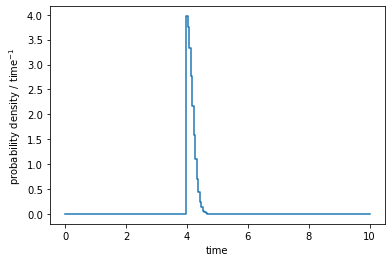

In [11]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.plot(t, pd, drawstyle='steps')
ax.set_xlabel('time')
ax.set_ylabel(r'probability density / time$^{-1}$')